# PART 1: Understanding Vehicle CO2 Emissions

![The British Columbia Highway 99 in Canada](bc-light-trail.jpg "The British Columbia Highway 99 in Canada")
Image from [Natural Resources Canada](https://natural-resources.canada.ca/sites/nrcan/files/energy/bc-light-trail.jpg)

### Key findings

Here are the several findings I discovered after investigating our data on CO2 emissions from vehicles in Canada:

- The median engine size in Canada is 3 liters, which is relatively large and typically found in larger vehicles such as SUVs, trucks, and sports cars.

- The average fuel consumption is highest for ethanol, followed by premium gasoline, regular gasoline, and diesel.

- There is a strong positive correlation between fuel consumption and CO2 emissions, implying that as fuel consumption rises, so will CO2 emissions.

- The MID-SIZE vehicle class has lower average CO2 emissions than the SUV-SMALL class.

- CO2 emissions from all vehicles in Canada are extremely high on average, with vehicles with engine sizes of 2 liters or less emitting 23% less CO2 than larger vehicles.

- Natural gas emits the least amount of CO2, while ethanol emits the most.

- The car manufacturer Smart has the lowest average CO2 emissions, while Bugatti has the highest.

##  1.1 Background

You volunteer for a public policy advocacy organization in Canada, and your colleague asked you to help her draft recommendations for guidelines on CO2 emissions rules. After researching emissions data for a wide range of Canadian vehicles, she would like you to investigate which vehicles produce lower emissions.

## 1.2 Objectives

The objective of this research is to gain some insights on the types of vehicles that have lower CO2 emissions. Specifically, I aim to answer the following questions:

1. What is the median engine size in liters?
2. What is the average fuel consumption for regular gasoline (X), premium gasoline (Z), ethanol (E), and diesel (D)?
3. What is the correlation between fuel consumption and CO2 emissions?
4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?
5. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?
6. Any other insights you found during your analysis?

## 1.3 Introduction

A Canadian group that works to improve public policy has given me the challenging task of looking into CO2 emissions data for a wide range of Canadian vehicles. My colleague wants to know which vehicles have less carbon dioxide (CO2) emissions, and I'm determined to give her useful information. I'll look into what the average engine size is, the average consumption for each fuel type, and if there's a link between fuel use and CO2 emissions. I'll also look at the data to find out which vehicle class has the lowest CO2 emissions and if there are any other interesting results. This undertaking won't be easy, but I'm up for the challenge and will deliver meaningful results to the organization.

## 1.4 Data description

The data comes from the Government of Canada's open data [website](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6).

The following list gives some descriptions of our key variables:

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving.

## 1.5 Exploratory data analysis

First, we import the necessary packages to explore our data. Then, we check for issues and missing values and specify key variables for analysis. This helps us understand and control our dataset.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
# Load the data into a Pandas DataFrame:
cars = pd.read_csv('data/co2_emissions_canada.csv')

In [3]:
# Explore and check the data
cars.head() # Print the first 5 rows of the data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244


In [4]:
cars.info() # Print information about the data, including the data types and number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 519.4+ KB


In [5]:
cars.isnull().sum()  # Check for missing values in each column

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption Comb (L/100 km)    0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:
cars.describe()  # Compute basic descriptive statistics for each numerical column

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,10.975071,250.584699
std,1.354170,1.828307,2.892506,58.512679
min,0.900000,3.000000,4.100000,96.000000
25%,2.000000,4.000000,8.900000,208.000000
50%,3.000000,6.000000,10.600000,246.000000
75%,3.700000,6.000000,12.600000,288.000000
max,8.400000,16.000000,26.100000,522.000000


In [7]:
# Create numpy arrays for our key variables
cars_makes = cars['Make'].to_numpy()
cars_models = cars['Model'].to_numpy()
cars_classes = cars['Vehicle Class'].to_numpy()
cars_engine_sizes = cars['Engine Size(L)'].to_numpy()
cars_cylinders = cars['Cylinders'].to_numpy()
cars_transmissions = cars['Transmission'].to_numpy()
cars_fuel_types = cars['Fuel Type'].to_numpy()
cars_fuel_consumption = cars['Fuel Consumption Comb (L/100 km)'].to_numpy()
cars_co2_emissions = cars['CO2 Emissions(g/km)'].to_numpy()

In [8]:
# Look at the first ten items in the CO2 emissions array
cars_co2_emissions[:10]

array([196, 221, 136, 255, 244, 230, 232, 255, 267, 212])

In [9]:
# Set the overall theme to fivethirtyeight
plt.style.use('fivethirtyeight')

After checking and specifying our data, we can now proceed with the main analysis.

## 1.6 Main analysis

### 1. What is the median engine size in liters?

The middle value, or the median engine size of the vehicles in our dataset is 3 liters. A 3-liter engine size is relatively large and is mostly found in large cars such as SUVs, trucks, and sports cars. A [larger engine](https://www.epa.gov/greenvehicles/greenhouse-gas-emissions-typical-passenger-vehicle) typically consumes more fuel and tends to also have higher CO2 emissions.

The median engine size is:  3.0 liters


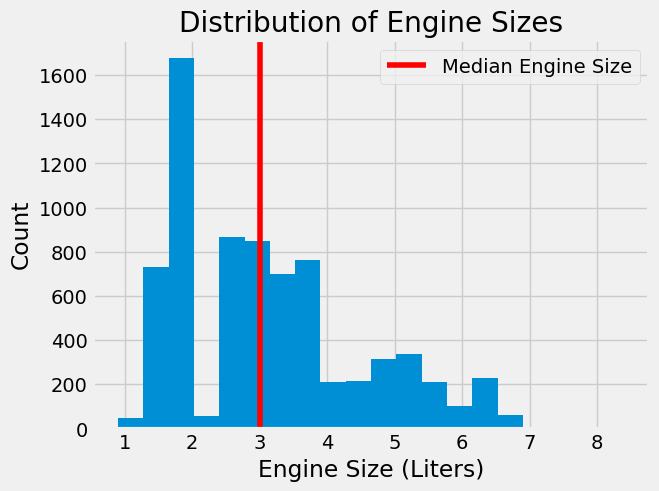

In [10]:
# Calculate the median engine size
median_engine_size = np.median(cars_engine_sizes)

# Print the result
print('The median engine size is: ', median_engine_size, 'liters')

# Create a histogram of engine sizes to visualize the distribution
plt.hist(cars_engine_sizes, bins=20)
plt.xlabel('Engine Size (Liters)')
plt.ylabel('Count')
plt.title('Distribution of Engine Sizes')
plt.axvline(x=median_engine_size, color='red', label='Median Engine Size')
plt.legend()
plt.show()

### 2. What is the average fuel consumption for regular gasoline (X), premium gasoline (Z), ethanol (E), and diesel (D)?

The average fuel consumption for different types of fuel is also noteworthy, with ethanol having the highest fuel consumption at 16.86 L/100 km, which is almost double that of diesel at 8.84 L/100 km. Regular and premium gasoline were not far behind, with 10.08 L/100 km and 11.42 L/100 km, respectively.

Fun fact! 
Did you know that [ethanol](https://afdc.energy.gov/fuels/ethanol_fuel_basics.html) is a renewable fuel made from various plants, such as corn or sugarcane that can be blended with gasoline to reduce greenhouse gas emissions?

Average fuel consumption for regular gasoline (X) is: 10.08 L/100 km
Average fuel consumption for premium gasoline (Z) is: 11.42 L/100 km
Average fuel consumption for ethanol (E) is: 16.86 L/100 km
Average fuel consumption for diesel (D) is: 8.84 L/100 km


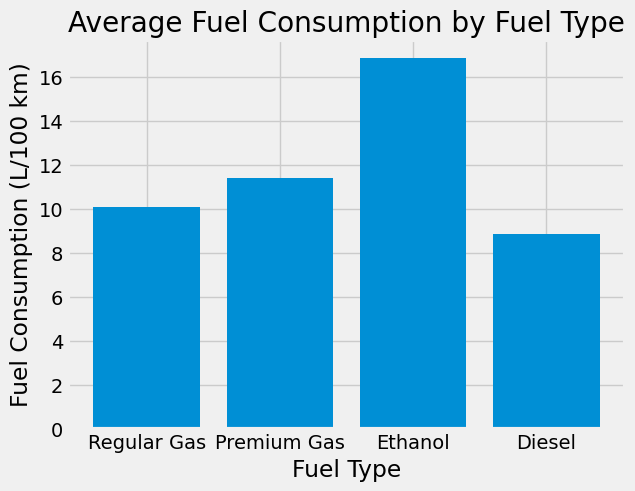

In [11]:
# Filter the data for the relevant fuel types
regular_gas = cars[cars['Fuel Type'] == 'X']['Fuel Consumption Comb (L/100 km)']
premium_gas = cars[cars['Fuel Type'] == 'Z']['Fuel Consumption Comb (L/100 km)']
ethanol = cars[cars['Fuel Type'] == 'E']['Fuel Consumption Comb (L/100 km)']
diesel = cars[cars['Fuel Type'] == 'D']['Fuel Consumption Comb (L/100 km)']

# Calculate the mean fuel consumption for each fuel type
mean_regular_gas = round(regular_gas.mean(), 2)
mean_premium_gas = round(premium_gas.mean(), 2)
mean_ethanol = round(ethanol.mean(), 2)
mean_diesel = round(diesel.mean(), 2)

# Print the results for each fuel type
print('Average fuel consumption for regular gasoline (X) is:', mean_regular_gas, 'L/100 km' )
print('Average fuel consumption for premium gasoline (Z) is:', mean_premium_gas, 'L/100 km')
print('Average fuel consumption for ethanol (E) is:', mean_ethanol, 'L/100 km')
print('Average fuel consumption for diesel (D) is:', mean_diesel, 'L/100 km')

# Create a bar chart of the mean fuel consumption for each fuel type
labels = ['Regular Gas', 'Premium Gas', 'Ethanol', 'Diesel']
values = [mean_regular_gas, mean_premium_gas, mean_ethanol, mean_diesel]

plt.bar(labels, values)
plt.title('Average Fuel Consumption by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.show()

### 3. What is the correlation between fuel consumption and CO2 emissions?

The correlation between fuel consumption and CO2 emissions is 0.92. This means that there is a strong positive relationship between the two variables. The individual data points inside the graph, which almost form a line, visually confirm this. In other words, as fuel consumption increases, CO2 emissions also increase. This is consistent with [the fact](https://ourworldindata.org/emissions-by-fuel) that burning fuel produces CO2 as a by-product.

Correlation between fuel consumption and CO2 emissions is: 0.92


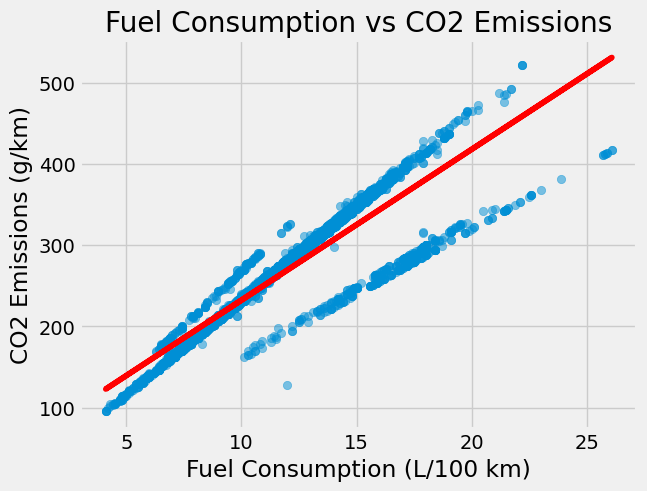

In [12]:
# Calculate the correlation coefficient between fuel consumption and CO2 emissions and round it
corr = np.corrcoef(cars_fuel_consumption, cars_co2_emissions)[0, 1]
corr = round(corr, 2)

# Print the correlation coefficient
print('Correlation between fuel consumption and CO2 emissions is:', corr)

# Fit a line to the data
slope, intercept = np.polyfit(cars_fuel_consumption, cars_co2_emissions, 1)

# Create a scatter plot of fuel consumption and CO2 emissions
plt.scatter(cars_fuel_consumption, cars_co2_emissions, alpha=0.5)
plt.title('Fuel Consumption vs CO2 Emissions')
plt.xlabel('Fuel Consumption (L/100 km)')
plt.ylabel('CO2 Emissions (g/km)')

# Add the trendline
plt.plot(cars_fuel_consumption, slope * cars_fuel_consumption + intercept, color='red')

plt.show()

### 4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?

An SUV - SMALL emits an average of 236.29 g/km of CO2, while a MID-SIZE emits 222.46 g/km. This means that the MID-SIZE vehicle class has lower average CO2 emissions than the SUV-SMALL class, indicating that larger vehicles emit more CO2. This is consistent with the fact that SUVs are one of the largest contributors to the increase in global CO2 emissions and that their emissions rose even [during the COVID-19 pandemic](https://www.iea.org/commentaries/carbon-emissions-fell-across-all-sectors-in-2020-except-for-one-suvs). Even though they are classified as "small," SUV - SMALL appear to be anything but.

Average CO2 Emissions for SUV - SMALL is: 236.29 g/km
Average CO2 Emissions for MID-SIZE is: 222.46 g/km


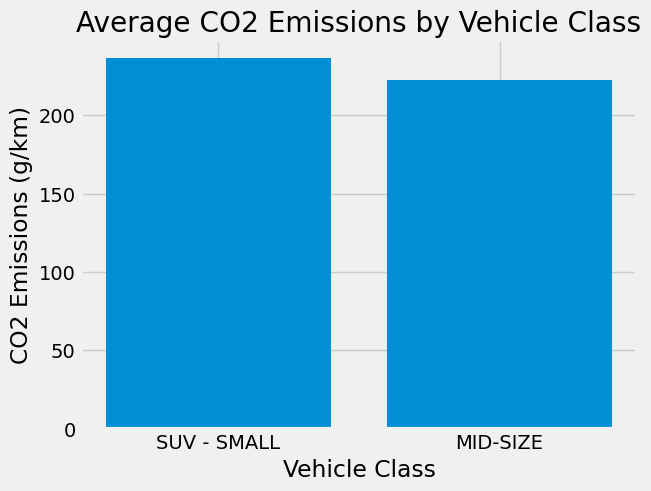

In [13]:
# Create a pandas dataframe with the CO2 emissions and vehicle class data
df = pd.DataFrame({'CO2 Emissions': cars_co2_emissions, 'Vehicle Class': cars_classes})

# Filter the data to only include 'SUV - SMALL' and 'MID-SIZE' vehicle classes
df_filtered = df.loc[df['Vehicle Class'].isin(['SUV - SMALL', 'MID-SIZE'])]

# Calculate the average CO2 emissions for 'SUV - SMALL' and 'MID-SIZE'
suv_small_co2 = np.mean(cars.loc[cars['Vehicle Class'] == 'SUV - SMALL', 'CO2 Emissions(g/km)'])
midsize_co2 = np.mean(cars.loc[cars['Vehicle Class'] == 'MID-SIZE', 'CO2 Emissions(g/km)'])

# Round the values to two decimal places
suv_small_co2 = round(suv_small_co2, 2)
midsize_co2 = round(midsize_co2, 2)

# Print the results
print('Average CO2 Emissions for SUV - SMALL is:', suv_small_co2, 'g/km')
print('Average CO2 Emissions for MID-SIZE is:', midsize_co2, 'g/km')

# Create a bar plot to compare the average CO2 emissions between the two vehicle classes
labels = ['SUV - SMALL', 'MID-SIZE']
values = [suv_small_co2, midsize_co2]
plt.bar(labels, values)

# Set the title and axis labels
plt.title('Average CO2 Emissions by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

### 5. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?

The average CO2 emissions for all vehicles are 250.58 g/km, while vehicles with engines 2.0L or smaller emit 198.27 g/km. This means that the average CO2 emissions for all vehicles in Canada are extremely high. This can be attributed to the fact that the median engine size in Canada is large, as we first saw. Vehicles with engine sizes of 2 liters or less emit 23% less CO2, as expected, because engine size and fuel consumption positively correlate with CO2 emissions. In 2019, Canada's National Observer, which focuses on climate journalism, reported Canadian cars as ["the world's dirtiest."](https://www.nationalobserver.com/2019/09/04/analysis/canadian-cars-are-worlds-dirtiest-ev-age-essential)

Average CO2 Emissions for all vehicles is: 250.58 g/km
Average CO2 Emissions for vehicles with engine size of 2.0L or smaller is: 198.27 g/km


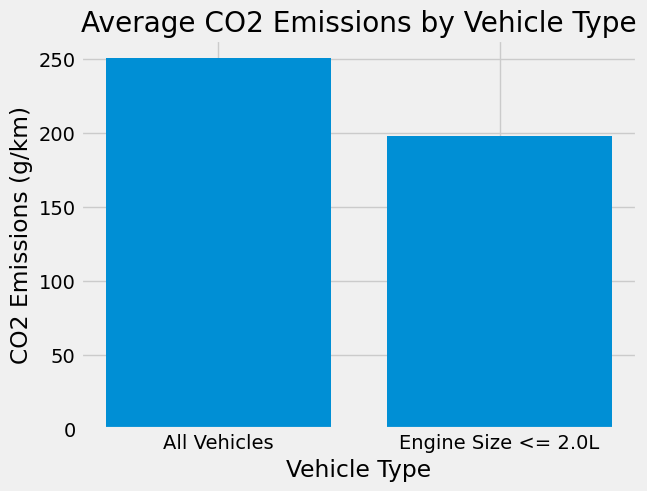

In [14]:
# Calculate the average CO2 emissions for all vehicles
avg_co2_all = np.mean(cars_co2_emissions)
avg_co2_all = round(avg_co2_all, 2)
print('Average CO2 Emissions for all vehicles is:', avg_co2_all, 'g/km')

# Calculate the average CO2 emissions for vehicles with an engine size of 2.0 liters or smaller
avg_co2_small_engine = np.mean(cars_co2_emissions[cars_engine_sizes <= 2.0])
avg_co2_small_engine = round(avg_co2_small_engine, 2)
print('Average CO2 Emissions for vehicles with engine size of 2.0L or smaller is:', avg_co2_small_engine, 'g/km')

# Create a bar plot to compare the average CO2 emissions
labels = ['All Vehicles', 'Engine Size <= 2.0L']
values = [avg_co2_all, avg_co2_small_engine]
plt.bar(labels, values)

# Set the title and axis labels
plt.title('Average CO2 Emissions by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

### 6. Any other insights you found during your analysis?

Aside from the main questions, here are some other questions and insights that I have scrutinized with the data:

#### 6.1 The intriguing two-line formation of data points in the third objective

Intriguingly, we can see that in the third objective, the data points have seemingly formed two lines; this is due to the fact that the variable "Fuel Consumption Comb (L/100 km)" is a combination of city and highway fuel consumption in liters per 100 km (L/100 km). It would be much more insightful if we could look at "Fuel Consumption Comb (L/100 km)" and see which consumes more fuel: the city or the highway?

After closely inspecting Natural Resources Canada's [2023 Fuel Consumption Guide](https://natural-resources.canada.ca/sites/nrcan/files/oee/pdf/transportation/fuel-efficient-technologies/2023FuelConsumptionGuide.pdf), I have found that, in general, city driving tends to consume more fuel than highway driving because of frequent stops and starts, lower speeds, and a higher engine load. However, this may not be true for all vehicles or situations. Furthermore, I have also found that the 55:45 percent combination of city and highway is a standard rating in measuring vehicles' fuel consumption. With that, we can say that the higher data points are from the city, while the lower ones are from the highway.

#### 6.2 Fuel types and their average CO2 emissions

We'll investigate fuel types and their average CO2 emissions. In our second objective, we explored the fuel consumption for each fuel type, but we missed the fuel type "N," which is natural gas. This time, we'll include natural gas, and we'll now look at their CO2 emissions.

Average CO2 emissions for D is: 237.55 g/km
Average CO2 emissions for E is: 275.09 g/km
Average CO2 emissions for N is: 213.00 g/km
Average CO2 emissions for X is: 235.12 g/km
Average CO2 emissions for Z is: 266.04 g/km


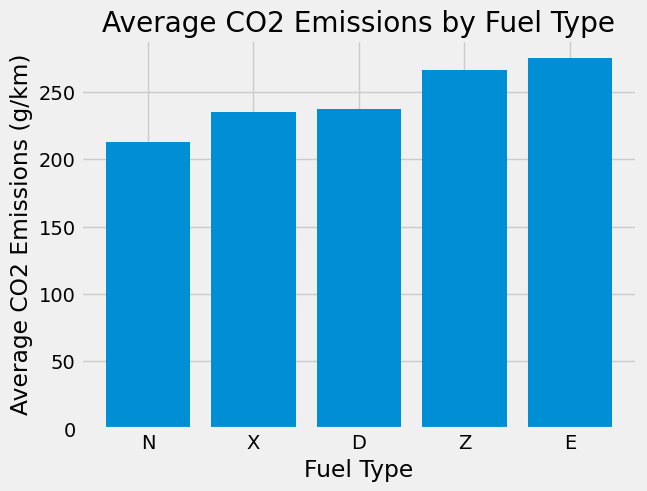

In [15]:
# Calculate the average CO2 emissions for each fuel type
fuel_types = np.unique(cars_fuel_types)
co2_means = []
for fuel_type in fuel_types:
    mask = (cars_fuel_types == fuel_type)
    co2_mean = np.mean(cars_co2_emissions[mask])
    co2_means.append(co2_mean)
    print(f"Average CO2 emissions for {fuel_type} is: {co2_mean:.2f} g/km")

# Sort the fuel types and CO2 means by increasing CO2 means
co2_means, fuel_types = zip(*sorted(zip(co2_means, fuel_types)))

# Create a bar plot
plt.bar(fuel_types, co2_means)
plt.title('Average CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.show()

The data shows that natural gas (N) has the lowest average CO2 emissions, while ethanol (E) has the highest. This insight ties together what we've found in our main analysis: that ethanol (E) is the most commonly used type of fuel and that the amount of fuel used and CO2 emissions are positively linked. With that, ethanol (E) is confirmed as the fuel type with the highest CO2 emissions. Notably, premium gasoline (Z) is not far behind ethanol (E), which has only 3% lower average CO2 emissions. With regards to the lowest-emitting fuel type: natural gas (N), its emissions are significantly lower by 25% than the highest-emitting ethanol (E).

#### 6.3 Car manufacturer with the lowest and highest average CO2 emissions

Now, let's look at which car manufacturer has the lowest and highest average CO2 emissions.

1. SMART: 151.43 g/km
2. HONDA: 190.22 g/km
3. FIAT: 192.25 g/km
4. MAZDA: 193.67 g/km
5. MINI: 196.59 g/km
6. SCION: 200.45 g/km
7. MITSUBISHI: 200.51 g/km
8. HYUNDAI: 208.87 g/km
9. VOLKSWAGEN: 209.34 g/km
10. KIA: 214.29 g/km
11. SUBARU: 217.61 g/km
12. ACURA: 223.65 g/km
13. TOYOTA: 224.42 g/km
14. ALFA ROMEO: 224.90 g/km
15. VOLVO: 230.06 g/km
16. BUICK: 233.06 g/km
17. NISSAN: 236.86 g/km
18. LEXUS: 241.11 g/km
19. CHRYSLER: 246.17 g/km
20. JEEP: 250.34 g/km
21. AUDI: 250.85 g/km
22. BMW: 254.01 g/km
23. INFINITI: 254.06 g/km
24. PORSCHE: 258.94 g/km
25. FORD: 260.99 g/km
26. CHEVROLET: 264.35 g/km
27. CADILLAC: 265.85 g/km
28. LINCOLN: 267.30 g/km
29. JAGUAR: 267.99 g/km
30. DODGE: 276.36 g/km
31. MERCEDES-BENZ: 277.39 g/km
32. GENESIS: 284.84 g/km
33. LAND ROVER: 287.65 g/km
34. RAM: 292.40 g/km
35. GMC: 299.92 g/km
36. MASERATI: 318.15 g/km
37. ASTON MARTIN: 339.62 g/km
38. BENTLEY: 362.93 g/km
39. ROLLS-ROYCE: 388.48 g/km
40. SRT: 389.00 g/km
41. LAMBORGHINI: 400.78 g/km
42. 

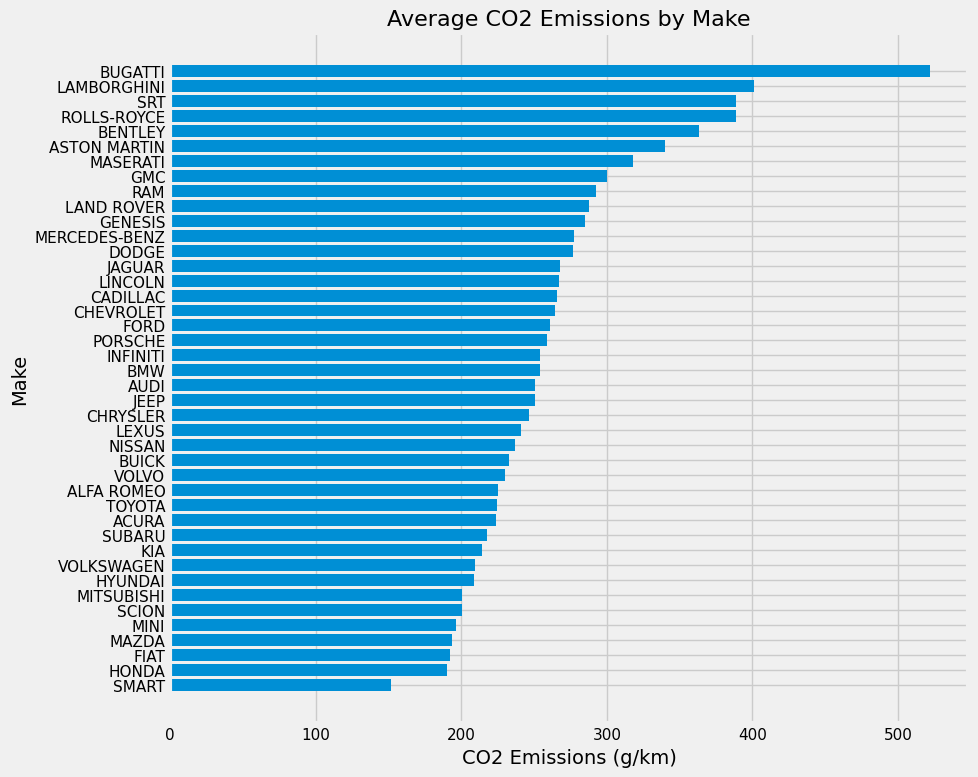

In [16]:
# Get unique makes
makes = np.unique(cars_makes)

# Calculate mean CO2 emissions for each make
co2_means = []
for make in makes:
    co2_means.append(np.mean(cars_co2_emissions[cars_makes == make]))

# Sort the makes and means in ascending order
sorted_indices = np.argsort(co2_means, axis=0)
makes = makes[sorted_indices]
co2_means = np.array(co2_means)[sorted_indices]

# Print the exact value of each car manufacturer's average CO2 emissions
for i, make in enumerate(makes):
    print(f"{i+1}. {make}: {co2_means[i]:.2f} g/km")

# Create a horizontal bar plot
plt.figure(figsize=(10,8))
plt.barh(makes, co2_means)
plt.title('Average CO2 Emissions by Make', fontsize=16)
plt.xlabel('CO2 Emissions (g/km)', fontsize=14)
plt.ylabel('Make', fontsize=14)
plt.tick_params(labelsize=11)
plt.tight_layout()
plt.show()

Based on my analysis, the result shows that the vehicle manufacturer, Smart, has the lowest average CO2 emissions. What makes this vehicle special? A closer inspection with our cars table reveals that this type of vehicle is powered by premium gasoline (the second highest CO2-emitting fuel type), but has only a 1-liter engine size, and is a two-seater. This car is small and compact!

On the other hand, we can see that some vehicle manufacturers—especially those that make luxury cars—make the highest CO2 emissions on average, with Bugatti on top. These types of vehicles also use premium gasoline and are also two-seaters, but their excessively large engines also make them excessively dirty for the environment—as their function is literally identical to that of environmentally friendly cars like Smart.

Using a similar dataset, [Hien and Kor (2022)](https://www.mdpi.com/2076-3417/12/2/803) has also found Bugatti to be the highest CO2-emitting vehicle, while Honda, which ranked second to Smart in our analysis, was found to have the lowest emissions.

## 1.7 Conclusions and Recommendations

Based on these findings, it is clear that there is a need for more sustainable transportation in Canada. The high levels of CO2 emissions from vehicles contribute significantly to climate change, and it is important to reduce them to meet the country's CO2 emissions reduction target.

Here are some recommendations based on my findings:

**1. Encourage the use of smaller vehicles.** The analysis showed that smaller vehicles emit less CO2 than larger vehicles. Encouraging people to buy smaller vehicles, especially those with engines of 2 liters or less, could significantly reduce the country's CO2 emissions.

**2. Encourage the use of more efficient fuels.** Natural gas was found to have the lowest average CO2 emissions, while ethanol had the highest. Encouraging the use of natural gas and other low-emission fuels could help reduce the overall CO2 emissions from vehicles.

**3. Increase public transportation options.** Public transportation is an efficient way to move people and can significantly reduce the number of vehicles on the road. Increasing the availability and reliability of public transportation options could encourage people to leave their cars at home and use public transportation instead.

**4. Implement policies to encourage the purchase of low-emission vehicles.** Policies such as rebates for low-emission vehicles or penalties for high-emission vehicles could encourage people to purchase more sustainable vehicles.

**5. Increase awareness and education.** Many people may not be aware of the impact that their transportation choices have on the environment. Increasing awareness and education about the benefits of sustainable transportation options could encourage people to make more sustainable choices.

By working together with consumers, car manufacturers, and policymakers, we can make significant strides towards a cleaner and more sustainable future.

# PART 2: Understanding the Bicycle Market

![The Strider 12 Classic in Color Red](Red-Classic-Angle_Product-Images.jpg "The Strider 12 Classic in Color Red")
Image from [Strider Bikes](https://striderbikes.com/wp-content/uploads/2019/01/Red-Classic-Angle_Product-Images.jpg)

### Key findings

Here are the several findings we have learned after exploring our bicycle store data:

- The most expensive item sold by the company is the Trek Domane SLR 9 Disc - 2018, while the least expensive is the Strider Classic 12 Balance Bike - 2018.
- The company has the most products in the Cruisers Bicycles category with 78, followed by Mountain Bikes and Road Bikes, both with 60 products.
- The brand Trek has the highest average list price, followed by Heller and Surly.
- Electric Bikes have the highest average list price, followed by Road Bikes and Cyclocross Bicycles.
- Trek is the most popular brand with 135 bikes in stock, followed by Electra with 118. The most popular category of bicycles is Cruisers Bicycles with 78 products available.
- The average price of bicycles increases by model year, from \$980.30 in 2016 to \$2,583.32 in 2019.

## 2.1 Background and Objectives

You work for a chain of bicycle stores. Your new team leader comes from a different industry and wants your help learning about the bicycle market. Specifically, they need to understand better the brands and categories for sale at your stores.

Help your team leader understand your company's products. Include:

1. What is the most expensive item your company sells? The least expensive?
2. How many different products of each category does your company sell?
3. What are the top three brands with the highest average list price? The top three categories?
4. Any other insights you found during your analysis?

## 2.2 Introduction

Hello, and welcome to the world of bicycles! As a data scientist for a chain of bicycle stores, I'm here to help you navigate the exciting world of cycling products. From children's bicycles to road bikes, our stores offer a wide variety of products that cater to all types of cycling enthusiasts. In this project, we'll explore some of the key insights about our products, including the most and least expensive items, the number of different products by category, the top brands with the highest average list price, the top categories, and more. So buckle up, grab your helmets, and let's ride into the data!

## 2.3 Data description

We have access to the following tables and their fields:

**products**
- "product_id" - Product identifier.
- "product_name" - The name of the bicycle.
- "brand_id" - You can look up the brand's name in the "brands" table.
- "category_id" - You can look up the category's name in the "categories" table.
- "model_year" - The model year of the bicycle.
- "list_price" - The price of the bicycle.

**brands**
- "brand_id" - Matches the identifier in the "products" table.
- "brand_name" - One of the nine brands the store sells.

**categories**
- "category_id" - Matches the identifier in the "products" table.
- "category_name" - One of the seven product categories in the store.

## 2.4 Exploratory data analysis

Before we dive into our main objectives, let's first explore and familiarize ourselves with the tables and fields in our dataset. By doing so, we can make sure that we have an initial understanding of our dataset.

In [17]:
SELECT *
FROM products;

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


The products table shows that we have a total of 321 different products, each with its own brand, category, model year, and price range.

In [18]:
SELECT * 
FROM brands;

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


The brands table shows that our stores carry nine different brands, from Electra to Trek.

In [19]:
SELECT * 
FROM categories;

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


The categories table shows that we have seven different product categories, from children's bicycles to road bikes.

These tables will provide us with the information we need to understand and become acquainted with our products and the market in which we operate. The information we gain here will also assist us in making important decisions for our stores.

Now, let's ride in with our main analysis.

## 2.5 Main analysis

### 1. What is the most expensive item your company sells? The least expensive?

The most expensive item that we sell is the Trek Domane SLR 9 Disc - 2018 which is priced at \$11,999.99. Wow, that's a very expensive bicycle!

On the other hand, the Strider Classic 12 Balance Bike - 2018 is our least expensive item, priced at \$89.99. Now, that's quite affordable.

This means that our store has a great price range, from a hundred-dollar bicycle to a thousand-dollar one—which also means we cater to customers with different ranges of budgets and needs.

In [20]:
-- Most expensive item
SELECT TOP 1 product_name, list_price
FROM products
ORDER BY list_price DESC;

,product_name,list_price
0,Trek Domane SLR 9 Disc - 2018,11999.99


In [21]:
-- Least expensive item
SELECT TOP 1 product_name, list_price
FROM products
ORDER BY list_price ASC;

,product_name,list_price
0,Strider Classic 12 Balance Bike - 2018,89.99


### 2. How many different products of each category does your company sell?

We have the most products in our Cruisers Bicycles category with 78, followed by Mountain Bikes and Road Bikes, both with 60 products. Just behind these two is the Children Bicycles category with 59 products. Comfort Bicycles, Electric Bicycles, and Cyclocross Bicycles trail behind with 30, 24, and 10 products, respectively.

This product breakdown tells us what we need to know about the different products we sell to our customers. It also shows how important it is to sort our inventory into different groups so we can meet the needs of different parts of the market. 

In [22]:
-- Number of products in each category
SELECT categories.category_name, COUNT(*) AS product_count
FROM products
INNER JOIN categories ON products.category_id = categories.category_id
GROUP BY categories.category_name;

,category_name,product_count
0,Children Bicycles,59
1,Comfort Bicycles,30
2,Cruisers Bicycles,78
3,Cyclocross Bicycles,10
4,Electric Bikes,24
5,Mountain Bikes,60
6,Road Bikes,60


### 3. What are the top three brands with the highest average list price? The top three categories?

After a thrilling ride with our data, we have identified the top three brands with the highest average list price in our stores. Topping the list is Trek, with an average list price of \$2,500.06, followed by Heller, with an average list price of \$2,172.99, and Surly, with an average list price of \$1,331.75.

In addition to this, we have also found the top three categories with the highest average list price. At the top of the list are Electric Bikes, with an average list price of \$3,281.66, followed by Road Bikes with an average list price of \$3,175.36, and Cyclocross Bicycles with an average list price of \$2,542.79.

These insights are essential for us to make informed decisions on which products to stock and how to price them in the market. By understanding the pricing trends of our top brands and categories, we can adjust our inventory and pricing strategies to stay competitive and profitable in the market.

In [23]:
-- Top three brands with highest average list price
SELECT TOP 3 brands.brand_name, AVG(products.list_price) AS avg_list_price
FROM products
INNER JOIN brands ON products.brand_id = brands.brand_id
GROUP BY brands.brand_name
ORDER BY avg_list_price DESC;

,brand_name,avg_list_price
0,Trek,2500.064074
1,Heller,2172.996666
2,Surly,1331.753600


In [24]:
-- Top three categories with highest average list price
SELECT TOP 3 categories.category_name, AVG(products.list_price) AS avg_list_price
FROM products
INNER JOIN categories ON products.category_id = categories.category_id
GROUP BY categories.category_name
ORDER BY avg_list_price DESC;

,category_name,avg_list_price
0,Electric Bikes,3281.656666
1,Road Bikes,3175.357333
2,Cyclocross Bicycles,2542.793000


### 4. Any other insights you found during your analysis?

Aside from our main objectives, I also wanted to share some other information that will help us learn more about the bicycle market. Here are some other insights that I want to share with you:

#### 4.1 What are the most popular bicycle brands and categories?

After looking at the numbers, we found that Trek is the most popular brand, with 135 bikes in our stock. Electra is a close second, with 118 bikes. The most popular category of bicycles is Cruisers Bicycles, with 78 products available, followed by Mountain Bikes and Road Bikes, both with 60 products.

These findings suggest that our customers have a strong preference for Trek and Electra brands and enjoy leisurely riding with Cruiser Bicycles.

In [25]:
-- Most popular brands
SELECT b.brand_name, COUNT(*) AS brand_count
FROM products p
JOIN brands b
ON p.brand_id = b.brand_id
GROUP BY b.brand_name
ORDER BY brand_count DESC;

,brand_name,brand_count
0,Trek,135
1,Electra,118
2,Surly,25
3,Sun Bicycles,23
4,Haro,10
5,Heller,3
6,Pure Cycles,3
7,Strider,3
8,Ritchey,1


In [26]:
-- Most popular categories
SELECT c.category_name, COUNT(*) AS category_count
FROM products p
JOIN categories c
ON p.category_id = c.category_id
GROUP BY c.category_name
ORDER BY category_count DESC;

,category_name,category_count
0,Cruisers Bicycles,78
1,Mountain Bikes,60
2,Road Bikes,60
3,Children Bicycles,59
4,Comfort Bicycles,30
5,Electric Bikes,24
6,Cyclocross Bicycles,10


#### 4.2 What is the average price of bicycles by model year?

Based on our analysis, we found that the average price of bicycles increases by model year. In 2016, the average price was \$980.30, while in 2019, it jumped to \$2,583.32. The largest increase occurred between 2018 and 2019, with the average price jumping from \$1,658.47 to \$2,583.32. That's a whopping 44% increase!

These insights can help us make informed decisions about pricing strategies and inventory management.

In [27]:
SELECT model_year, AVG(list_price) AS avg_price
FROM products
GROUP BY model_year
ORDER BY model_year;

,model_year,avg_price
0,2016,980.299230
1,2017,1279.931176
2,2018,1658.470441
3,2019,2583.323333


## 2.6 Conclusions

In conclusion, our store has a large selection of bikes that cater to different budgets, needs, and preferences. We have the most products in our Cruisers Bicycles category, followed by Mountain Bikes and Road Bikes. Trek is the most popular brand, and our customers seem to have a strong preference for Cruiser Bicycles. In terms of pricing, the average price of bicycles increases by model year, and Trek, Heller, and Surly are the top three brands with the highest average list price. Electric Bikes have the highest average list price among categories, followed by Road Bikes and Cyclocross Bicycles. These findings will help us make informed decisions about pricing strategies, inventory management, and which products to stock to stay competitive and profitable in the market.

## 2.7 Recommendations

Here are some recommendations based on our findings:

**1. Enhance Competitive Edge.** To maintain a competitive advantage, the company should continue to offer products at various price points to accommodate different customer budgets and preferences. This approach enables the company to meet the needs of its customers while setting itself apart from competitors.

**2. Manage Inventory.** Based on the product breakdown, the company should ensure that it has enough inventory in popular categories such as Cruisers Bicycles, Mountain Bikes, and Road Bikes. Conversely, the company should review its inventory of less popular categories, such as Cyclocross Bicycles to determine if it needs to stock fewer items.

**3. Optimize Pricing Strategy.** The pricing analysis shows that the company could increase its profitability by stocking more Electric Bikes, which have the highest average list price. The company could also consider pricing strategies for Road Bikes and Cyclocross Bicycles to boost sales and profitability.

**4. Promote Popular Brands and Categories.** The analysis of the most popular brands and categories reveals that the company should continue to stock and promote Trek and Electra products, which are popular with customers.

**5. Review Pricing for Older Models.** The average price increase by model year indicates that the company should review its pricing strategies for older model year bicycles to ensure that they are competitive in the market. Additionally, the company could consider offering discounts for older models to encourage sales and clear inventory.